In [ ]:
import pandas as pd

url = "https://stats.idre.ucla.edu/stat/data/binary.csv"
df = pd.read_csv(url)
print(df.head())

print(df.info())

print(df["admit"].value_counts())

   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB
None
admit
0    273
1    127
Name: count, dtype: int64


In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

df["rank"] = df["rank"].astype("category")

model = smf.glm(
    formula="admit ~ gre + gpa + + C(rank)", data=df, family=sm.families.Binomial()
)
result = model.fit()

print(result.summary())
print(f"Log-Likelihood: {result.llf:.4f}")

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  admit   No. Observations:                  400
Model:                            GLM   Df Residuals:                      394
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -229.26
Date:                Sat, 09 Aug 2025   Deviance:                       458.52
Time:                        15:42:57   Pearson chi2:                     397.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.09846
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.9900      1.140     -3.500   

In [ ]:
pred_prob_all = result.fittedvalues

pred_class = (pred_prob_all > 0.5).astype(int)

confusion = pd.crosstab(
    df["admit"], pred_class, rownames=["Actual"], colnames=["Predicted"]
)

print(" :\n", confusion)

 :
 Predicted    0   1
Actual            
0          254  19
1           97  30


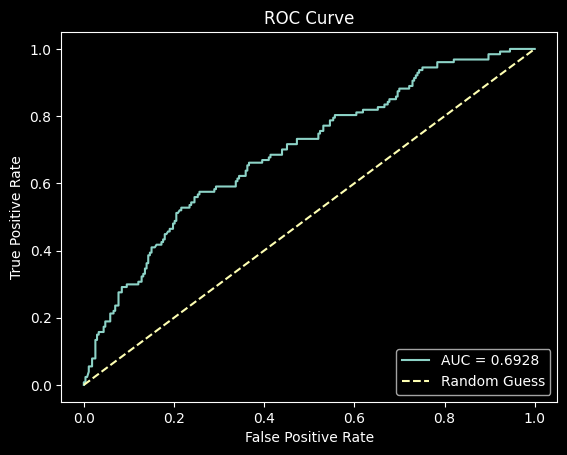

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_true = df["admit"]
y_scores = pred_prob_all

fpr, tpr, thresholds = roc_curve(y_true, y_scores)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()